In [3]:
import numpy as np
from scipy.stats import norm, lognorm, binom, beta
import matplotlib.pyplot as plt

Exercise 2


In [4]:
mu = 5
sigma = 1
n = 100
X = norm.rvs(mu, sigma, size = n)
X

array([7.56198498, 4.32108458, 6.18674968, 4.80088245, 4.73543795,
       3.90541247, 5.72152646, 5.65672242, 5.56601751, 4.22673541,
       5.78511483, 5.8413351 , 5.05659791, 4.27231424, 3.19889261,
       4.35588251, 5.69759902, 5.53680828, 5.05961673, 7.031874  ,
       5.93215416, 5.44477036, 5.05802121, 7.00181816, 5.55246399,
       6.02955179, 6.03945062, 5.23419924, 4.76654163, 4.60242112,
       4.97689057, 5.07253227, 5.63166976, 4.67072252, 3.39210479,
       4.5122733 , 5.46586098, 4.87401822, 6.33923796, 6.19831537,
       3.5977193 , 3.8985542 , 5.68087041, 4.56111783, 4.93021349,
       4.47260524, 3.62802842, 4.65567301, 3.32673537, 4.72594121,
       5.89310534, 5.50972921, 7.67692854, 5.61221741, 5.65450012,
       4.23765028, 4.23122201, 6.14894084, 4.43691877, 4.55738678,
       4.82525033, 2.42426115, 5.08223694, 6.38705069, 5.53719507,
       7.65762785, 6.40491627, 5.17689066, 4.65134687, 4.99146108,
       4.7244903 , 2.82048058, 5.48743711, 3.95728036, 6.04081

5.021895588659964

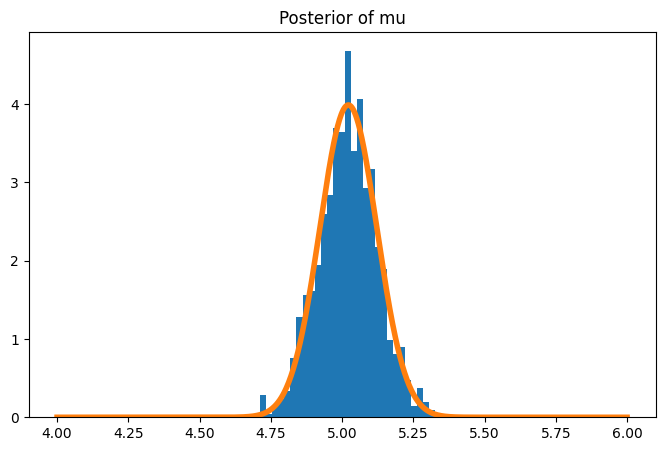

In [5]:
#Posterior is proportional to the likelihood times the prior (1). The likelihood is proportional
#to a Normal dist with mean np.mean(X) and variance (sigma**2)/n
#Sampling the likelihood VS analytical function
post_mu = np.mean(X)
post_std = np.sqrt(1./n)
linspace = np.linspace(4, 6, 1000)

post_samples = norm.rvs(post_mu, post_std, 1000)

post_pdf = norm.pdf(linspace, post_mu, post_std)

plt.figure(figsize = (1.618*5., 5.))
plt.hist(post_samples, bins = 30, density = True)
plt.plot(linspace, post_pdf, linewidth=4)
plt.title('Posterior of mu')
post_mu



Text(0.5, 1.0, 'Posterior of theta')

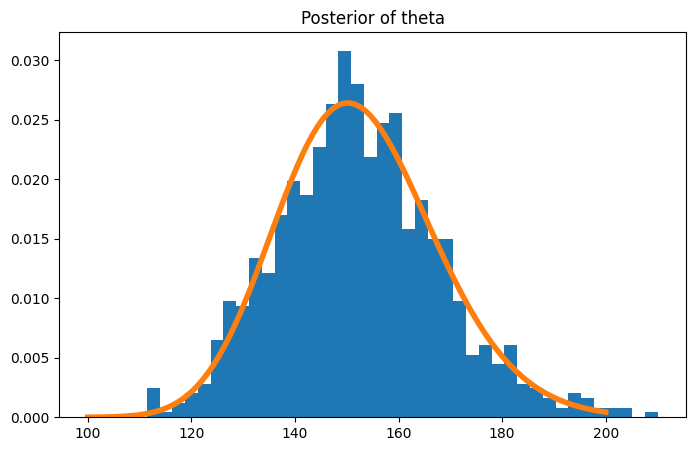

In [6]:
#Since mu has a normal distribution, theta = np.exp(mu) must have a lognormal distribution
#with mean np.mean(post_samples) and std 1/np.sqrt(n)

linspace = np.linspace(100, 200, 100)
sample_theta = np.exp(post_samples)
analytical_theta = lognorm.pdf(linspace, s = post_std, scale = np.exp(post_mu))



plt.figure(figsize = (1.618*5., 5.))
plt.hist(sample_theta, bins = 40, density = True)
plt.plot(linspace, analytical_theta , linewidth=4)
plt.title('Posterior of theta')

In [7]:
#mu is normal so i can compute a normal confidence interval
z = norm.ppf(0.975)
ci_analatyc = (post_mu - z * post_std, post_mu + z * post_std)

ci_simulation = (np.quantile(post_samples, 0.025), np.quantile(post_samples, 0.975))
ci_analatyc, ci_simulation

((4.825899190205959, 5.217891987113969),
 (4.825450058014508, 5.226273526776675))

In [8]:
#theta is not normally distributed
z = norm.ppf(0.975)
ci_simulation = (np.quantile(sample_theta, 0.025), np.quantile(sample_theta, 0.975))
ci_simulation

(124.64255683519713, 186.09802050203376)

Exercise 4


In [9]:
n = 50
n1 = 30
n2 = 40
p1_mle = n1 / n
p2_mle = n2 / n
tau_mle = p2_mle - p1_mle
se_hat = np.sqrt((p1_mle * (1 - p1_mle) / n) + (p2_mle * (1 - p2_mle) / n))
z_90 = norm.ppf(0.95)
ci = (tau_mle - z_90 * se_hat, tau_mle + z_90 * se_hat)
tau_mle, ci

(0.20000000000000007, (0.05287981908397718, 0.3471201809160229))

In [10]:
B = 10000
tau_boot = np.empty(0)
for _ in range(B):
  xx1 = binom.rvs(n, p1_mle)
  xx2 = binom.rvs(n, p2_mle)
  stat = xx2 / n - xx1 / n
  tau_boot = np.append(tau_boot, stat)
se_boot = np.sqrt(np.sum((tau_boot - tau_mle)**2) / B)
ci = (tau_mle - z_90 * se_boot, tau_mle + z_90 * se_boot)
ci

(0.05323849394411448, 0.3467615060558856)

In [11]:
#both p1 and p2 posteriors are beta distribution with parameter (n_i + 1, n - n_i + 1)
post_p1 = beta.rvs(n1 + 1, n - n1 + 1, size = B)
post_p2 = beta.rvs(n2 + 1, n - n2 + 1, size = B)

post_tau_boot = np.array(post_p2 - post_p1)
post_tau_mean = np.mean(post_tau_boot)

q_05 = np.quantile(post_tau_boot, 0.05)
q_95 = np.quantile(post_tau_boot, 0.95)

boot_ci = (q_05, q_95)
boot_ci



(0.04493413453798338, 0.3345345072209484)

In [12]:
#MLE is equivariant so we can plug in p1 and p2 mles, and use Fisher info matrix to compute standard error

mle_p1_ratio = p1_mle / (1. - p1_mle)
mle_p2_ratio = p2_mle / (1. - p2_mle)

mle_psi = np.log(mle_p1_ratio / mle_p2_ratio)
mle_psi_se = np.sqrt(1. / (p1_mle * (1. - p1_mle) * n) + 1. /  (p2_mle * (1. - p2_mle) * n))

ci_psi = (mle_psi - z_90 * mle_psi_se, mle_psi + z_90 * mle_psi_se)
mle_psi, ci_psi


(-0.9808292530117265, (-1.731598782407984, -0.2300597236154691))

In [13]:
#Sampling for psi
post_p1_ratio = post_p1 / (1. - post_p1)
post_p2_ratio = post_p2 / (1. - post_p2)
psi_boot = np.log(post_p1_ratio / post_p2_ratio)
post_psi_mean = np.mean(psi_boot)
q_05 = np.quantile(psi_boot, 0.05)
q_95 = np.quantile(psi_boot, 0.95)

post_psi_mean, (q_05, q_95)


(-0.9546991097270193, (-1.6906379272671086, -0.22009723577061524))

Exercise 5

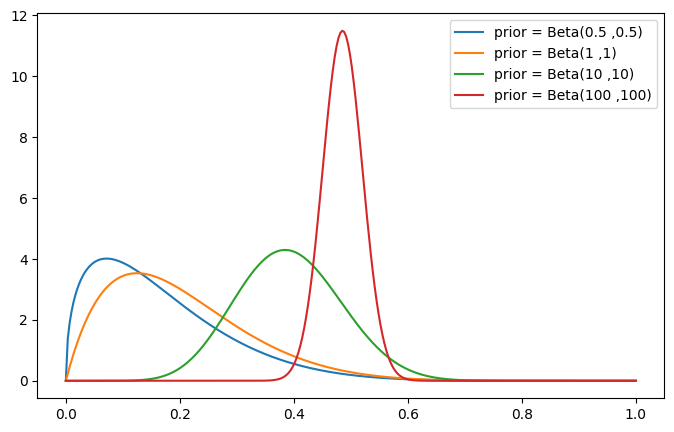

In [15]:
#The Beta prior can be interpreted as observing alpha + beta events
#with alpha success and a uniform prior

prior_param = [(1/2, 1/2), (1, 1), (10, 10), (100, 100)]
n = 10
k = 2
plt.figure(figsize = (1.618*5., 5.))
xx = np.linspace(0, 1, 300)
for (a, b) in prior_param:
  plt.plot(xx, beta.pdf(xx, k + a - 1, n - k + b - 1), label=f'prior = Beta({str(a)} ,{str(b)})')
  plt.legend()

plt.show();



Exercise 8

In [ ]:
#TBD